In [107]:
# predict the price of a house with 3000 sft and 4 bedrooms

In [108]:
# Load Dataset

In [109]:
import pandas as pd
df = pd.read_csv("house-prices.csv")
df.head()

,area_in_square_feet,no_rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [110]:
df.shape

(47, 3)

In [111]:
# check for Nulls

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   area_in_square_feet  47 non-null     int64
 1   no_rooms             47 non-null     int64
 2   price                47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [113]:
# check for correlation

<AxesSubplot:xlabel='area_in_square_feet', ylabel='price'>

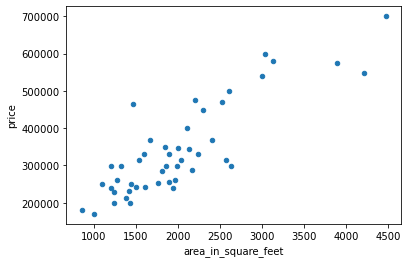

In [114]:
df.plot.scatter('area_in_square_feet', 'price')

<AxesSubplot:xlabel='no_rooms', ylabel='price'>

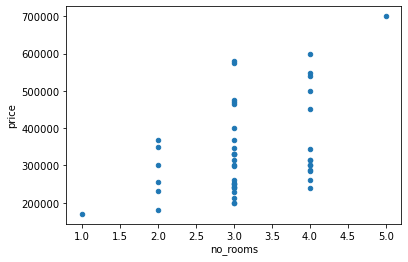

In [115]:
df.plot.scatter('no_rooms', 'price')

In [116]:
# Drop columns if there is no correlation
# because those are not useful for our algorithm processing
df.corr()

,area_in_square_feet,no_rooms,price
area_in_square_feet,1.000000,0.559967,0.854988
no_rooms,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


In [117]:
#data distribution

<AxesSubplot:>

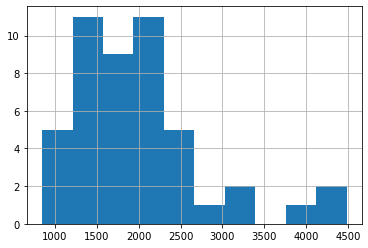

In [118]:
df.area_in_square_feet.hist()

In [119]:
df.describe()

,area_in_square_feet,no_rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [120]:
# identify your input and output

In [121]:
y = df.price #output or target

In [122]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [123]:
x = df.drop(columns=['price']) #input or features

In [124]:
x.head()

,area_in_square_feet,no_rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [125]:
#f(x)

In [126]:
#y = f(x)
#price = f(x)
#price = f(sft,bedrooms)

In [127]:
#price = f([sft,rooms])

In [128]:
# choose your algorithm

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr = LinearRegression()

In [131]:
# train your model

In [132]:
lr.fit(x,y)

LinearRegression()

In [133]:
# check accuracy

In [134]:
lr.score(x,y)

0.7329450180289141

In [135]:
# predict

In [136]:
lr.predict(x)

array([356283.1103389 , 286120.93063401, 397489.46984812, 269244.1857271 ,
       472277.85514636, 330979.02101847, 276933.02614885, 262037.48402897,
       255494.58235014, 271364.59918815, 324714.54068768, 341805.20024107,
       326492.02609913, 669293.21223209, 239902.98686016, 374830.38333402,
       255879.96102141, 235448.2452916 , 417846.48160547, 476593.38604091,
       309369.11319496, 334951.62386342, 286677.77333009, 327777.17551607,
       604913.37413438, 216515.5936252 , 266353.01492351, 415030.01477434,
       369647.33504459, 430482.39959029, 328130.30083656, 220070.5644481 ,
       338635.60808944, 500087.73659911, 306756.36373941, 263429.59076914,
       235865.87731365, 351442.99009906, 641418.82407778, 355619.31031959,
       303768.43288347, 374937.34065726, 411999.63329673, 230436.66102696,
       190729.36558116, 312464.00137413, 230854.29304902])

In [137]:
lr.predict([[3000,4]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472277.85514636])

In [138]:
lr.predict([[3000,4], [2000,3]]) #Nested Array because we can give multiple inputs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472277.85514636, 341805.20024107])

In [139]:
# residual plot


In [140]:
import matplotlib.pyplot as plt

In [141]:
df['predicted_price'] = lr.predict(x)

In [142]:
df.head()

,area_in_square_feet,no_rooms,price,predicted_price
0,2104,3,399900,356283.110339
1,1600,3,329900,286120.930634
2,2400,3,369000,397489.469848
3,1416,2,232000,269244.185727
4,3000,4,539900,472277.855146


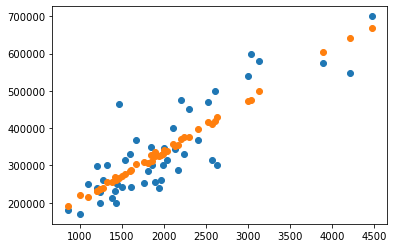

In [143]:
plt.scatter(df.area_in_square_feet, df.price)
plt.scatter(df.area_in_square_feet, df.predicted_price)

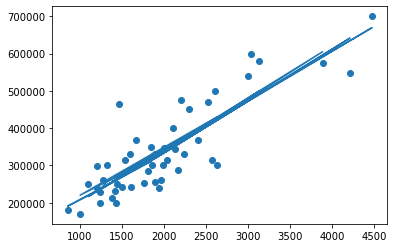

In [144]:
plt.scatter(df.area_in_square_feet, df.price)
plt.plot(df.area_in_square_feet, df.predicted_price)

In [145]:
#y = mx + c

In [146]:
#price = m1*sqft + m2*rooms +c

In [147]:
lr.intercept_  # This is c i.e., intercept

89597.90954279748

In [148]:
lr.coef_ #This is m1 and m2 i.e., slopes or coefficients

array([  139.21067402, -8738.01911233])

In [149]:
x.columns

Index(['area_in_square_feet', 'no_rooms'], dtype='object')

In [150]:
m1=139.21067402
m2=-8738.01911233
c=89597.90954279748

In [151]:
m1*3000 + m2*4 +c

472277.85515347746

# Min Max Scaling

In [152]:
# In this Scaling 
#lowest is taken as 0
#highest is taken as 1
#and rest are scaled between 0 and 1

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
x.head()

,area_in_square_feet,no_rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [155]:
mms = MinMaxScaler()

In [156]:
mms.fit(x)
x_mms_scaled = mms.transform(x)

In [157]:
x_mms_scaled

array([[0.34528406, 0.5       ],
       [0.20628792, 0.5       ],
       [0.42691671, 0.5       ],
       [0.1555433 , 0.25      ],
       [0.59238831, 0.75      ],
       [0.31246553, 0.75      ],
       [0.18808605, 0.5       ],
       [0.15857694, 0.5       ],
       [0.145615  , 0.5       ],
       [0.17705461, 0.5       ],
       [0.30005516, 0.75      ],
       [0.31660232, 0.5       ],
       [0.28626586, 0.5       ],
       [1.        , 1.        ],
       [0.11472697, 0.5       ],
       [0.39933811, 0.75      ],
       [0.12906784, 0.25      ],
       [0.10590182, 0.5       ],
       [0.48455598, 0.75      ],
       [0.60093767, 0.75      ],
       [0.25234418, 0.5       ],
       [0.28571429, 0.25      ],
       [0.20739106, 0.5       ],
       [0.30612245, 0.75      ],
       [0.83783784, 0.5       ],
       [0.06839493, 0.5       ],
       [0.16712631, 0.5       ],
       [0.46166575, 0.5       ],
       [0.37175951, 0.5       ],
       [0.49227799, 0.5       ],
       [0.

In [158]:
lr.fit(x_mms_scaled, y)

LinearRegression()

In [159]:
lr.score(x_mms_scaled, y)

0.7329450180289143

# Standard Scaling

In [160]:
# In this
# Mean is taken as 1
# values below Mean is marked as -ve
# values after Mean is marked as +Ve

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
ss = StandardScaler()

In [163]:
x_std_scaled = ss.fit(x).transform(x)

In [164]:
x_std_scaled

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [165]:
lr.fit(x_std_scaled,y)

LinearRegression()

In [166]:
lr.score(x_std_scaled,y)

0.7329450180289143

# Outliers

<AxesSubplot:>

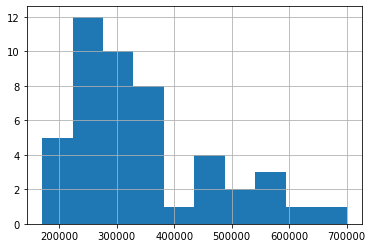

In [167]:
df.price.hist()

<AxesSubplot:>

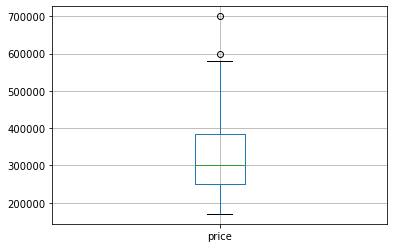

In [168]:
df.boxplot("price")

<AxesSubplot:ylabel='Density'>

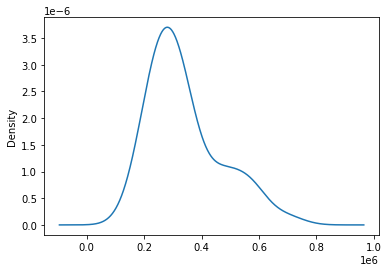

In [169]:
df.price.plot.kde()

In [170]:
df.describe()

,area_in_square_feet,no_rooms,price,predicted_price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574,340412.659574
std,794.702354,0.760982,125039.899586,107049.419075
min,852.000000,1.000000,169900.000000,190729.365581
25%,1432.000000,3.000000,249900.000000,264891.302846
50%,1888.000000,3.000000,299900.000000,326492.026099
75%,2269.000000,4.000000,384450.000000,374883.861996
max,4478.000000,5.000000,699900.000000,669293.212232


In [171]:
# Here min q0 quartile, 25% q1 quartile, 50% q2 quartile, 75% q3 quartile, max q4 quartile

In [172]:
#IQR = Inter Quartile Range

In [173]:
q1 = df.price.quantile(0.25)

In [174]:
q3 = df.price.quantile(0.75)

In [175]:
iqr = q3 - q1

In [176]:
iqr

134550.0

In [177]:
uppercutoff = q3 + (1.5 * iqr)

In [178]:
uppercutoff

586275.0

In [179]:
# Anything above uppercutoff is an outlier 

In [180]:
lowercutoff = q1 - (1.5 * iqr)

In [181]:
lowercutoff

48075.0

In [182]:
# Anything below lowercutoff is an outlier 

In [183]:
df[df.price > uppercutoff]

,area_in_square_feet,no_rooms,price,predicted_price
13,4478,5,699900,669293.212232
19,3031,4,599000,476593.386041


In [184]:
df[df.price < lowercutoff]

,area_in_square_feet,no_rooms,price,predicted_price


<AxesSubplot:>

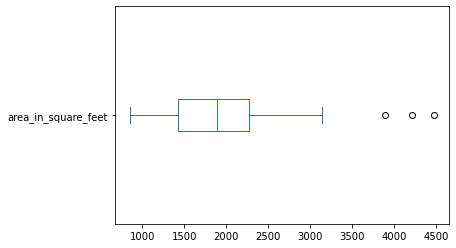

In [185]:
df.area_in_square_feet.plot.box(vert = False)

In [186]:
df.describe()

,area_in_square_feet,no_rooms,price,predicted_price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574,340412.659574
std,794.702354,0.760982,125039.899586,107049.419075
min,852.000000,1.000000,169900.000000,190729.365581
25%,1432.000000,3.000000,249900.000000,264891.302846
50%,1888.000000,3.000000,299900.000000,326492.026099
75%,2269.000000,4.000000,384450.000000,374883.861996
max,4478.000000,5.000000,699900.000000,669293.212232


In [187]:
q1 = df.area_in_square_feet.quantile(0.25)

In [188]:
q3 = df.area_in_square_feet.quantile(0.75)

In [189]:
iqr = q3 - q1

In [190]:
uppercutoff = q3 + (iqr * 1.5)

In [191]:
lowercutoff = q1 - (iqr * 1.5)

In [192]:
df[df.area_in_square_feet > uppercutoff]

,area_in_square_feet,no_rooms,price,predicted_price
13,4478,5,699900,669293.212232
24,3890,3,573900,604913.374134
38,4215,4,549000,641418.824078


In [193]:
df[df.area_in_square_feet < lowercutoff]

,area_in_square_feet,no_rooms,price,predicted_price


# Remvoing OUtliers

In [194]:
q1 = df.area_in_square_feet.quantile(0.25)
q3 = df.area_in_square_feet.quantile(0.75)
iqr = q3 - q1
uppercutoff = q3 + (1.5 * iqr)
lowercutoff = q1 - (1.5 * iqr)

In [195]:
df[df.area_in_square_feet > uppercutoff]

,area_in_square_feet,no_rooms,price,predicted_price
13,4478,5,699900,669293.212232
24,3890,3,573900,604913.374134
38,4215,4,549000,641418.824078


In [196]:
df[df.area_in_square_feet < lowercutoff]

,area_in_square_feet,no_rooms,price,predicted_price


In [200]:
df.shape

(47, 4)

In [ ]:
df.drop([13, 24, 38], inplace=True)

In [202]:
df.shape

(44, 4)

<AxesSubplot:>

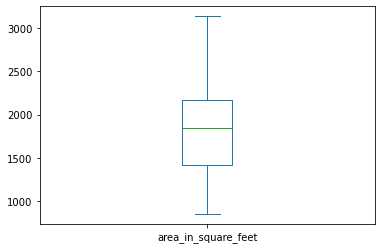

In [203]:
df.area_in_square_feet.plot.box()